In [1]:
import numpy as np
import scipy.signal as signal
import soundfile as sf
import IPython.display as ipd
from datetime import datetime
import newreverb as rvb

input_filename = "../musicpiece/mixkit-medieval-show-fanfare-announcement-226.wav"
samples, samplerate = sf.read(input_filename)
audio = ipd.Audio(input_filename)
ipd.display(audio)


In [2]:
mode=rvb.SATREV()

In [3]:
chunk_size = 1024
output=np.zeros(samples.shape)
for i in range(0, len(samples)-chunk_size, chunk_size):
    chunk = samples[i:i+chunk_size]
    np.copyto(output[i:i+chunk_size],mode.process(chunk))
# Normalize the output
remaining_samples = samples[i+chunk_size:]  
output[i+chunk_size:] = mode.process(remaining_samples) 
output/=np.abs(output).max()

In [4]:
output_filename = 'starev.wav'
sf.write(output_filename, output, samplerate)

In [5]:
audio = ipd.Audio(output_filename)
ipd.display(audio)

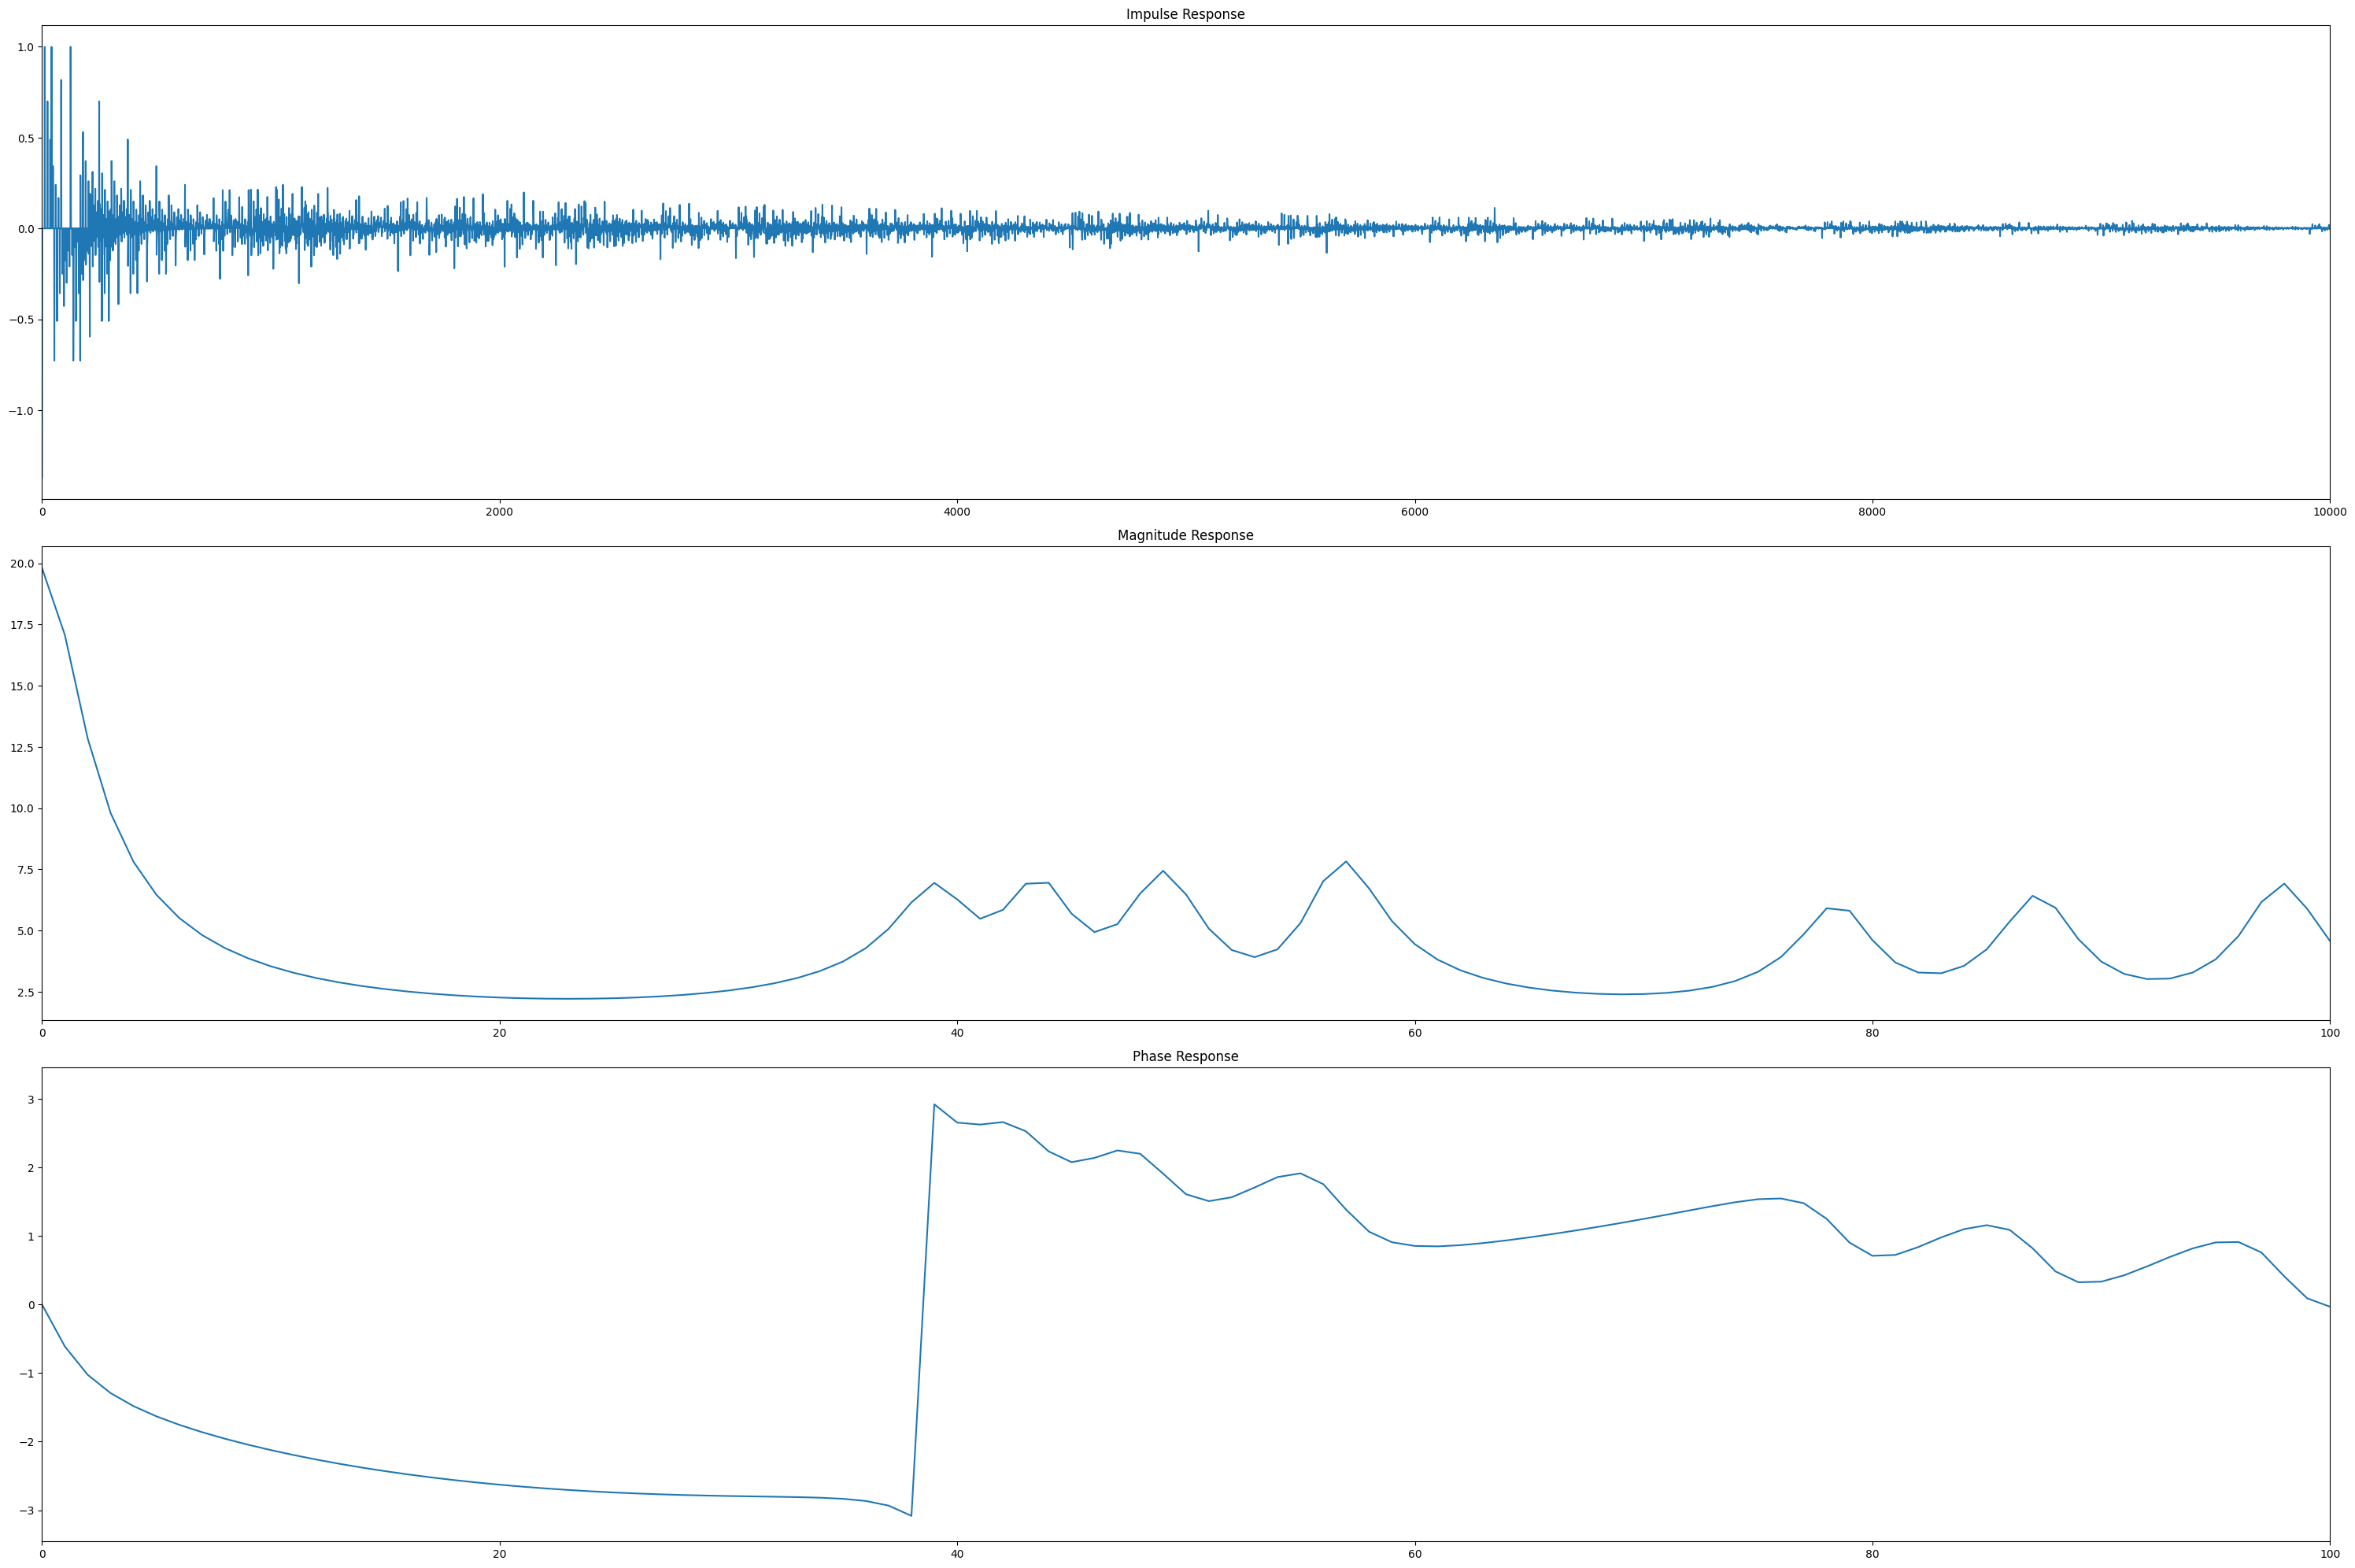

In [6]:
import matplotlib.pyplot as plt  
impulse = np.zeros((44100,2))  
impulse[0][0] = 1  # 在t=0时刻赋值为1
impulse[0][1] = 1

modeimpulse=rvb.SATREV()

chunk_size = 1024
output=np.zeros(impulse.shape)

for i in range(0, len(impulse)-chunk_size, chunk_size):
    chunk = impulse[i:i+chunk_size]
    np.copyto(output[i:i+chunk_size],modeimpulse.process(chunk))
# Normalize the output
remaining_samples=impulse[i+chunk_size:]
output[i+chunk_size:] = mode.process(remaining_samples) 

impulse_response = output[:,0] 
# 计算频率响应  
frequency_response = np.fft.fft(impulse_response)  
  
# 计算幅度和相位  
magnitude = np.abs(frequency_response)  
phase = np.angle(frequency_response)  
  
# 绘制结果
plt.figure(figsize=(30, 20))  # 设置整体图的尺寸  
plt.subplot(3, 1, 1)  
plt.plot(impulse_response)  
plt.title('Impulse Response') 
plt.xlim(0, 10000) 
  
plt.subplot(3, 1, 2)  
plt.plot(magnitude)  
plt.title('Magnitude Response')  
plt.xlim(0, 100) 
  
plt.subplot(3, 1, 3)  
plt.plot(phase)  
plt.title('Phase Response')  
plt.xlim(0, 100) 

plt.tight_layout(pad=1.0)  # 增加子图之间的间距
plt.show()  

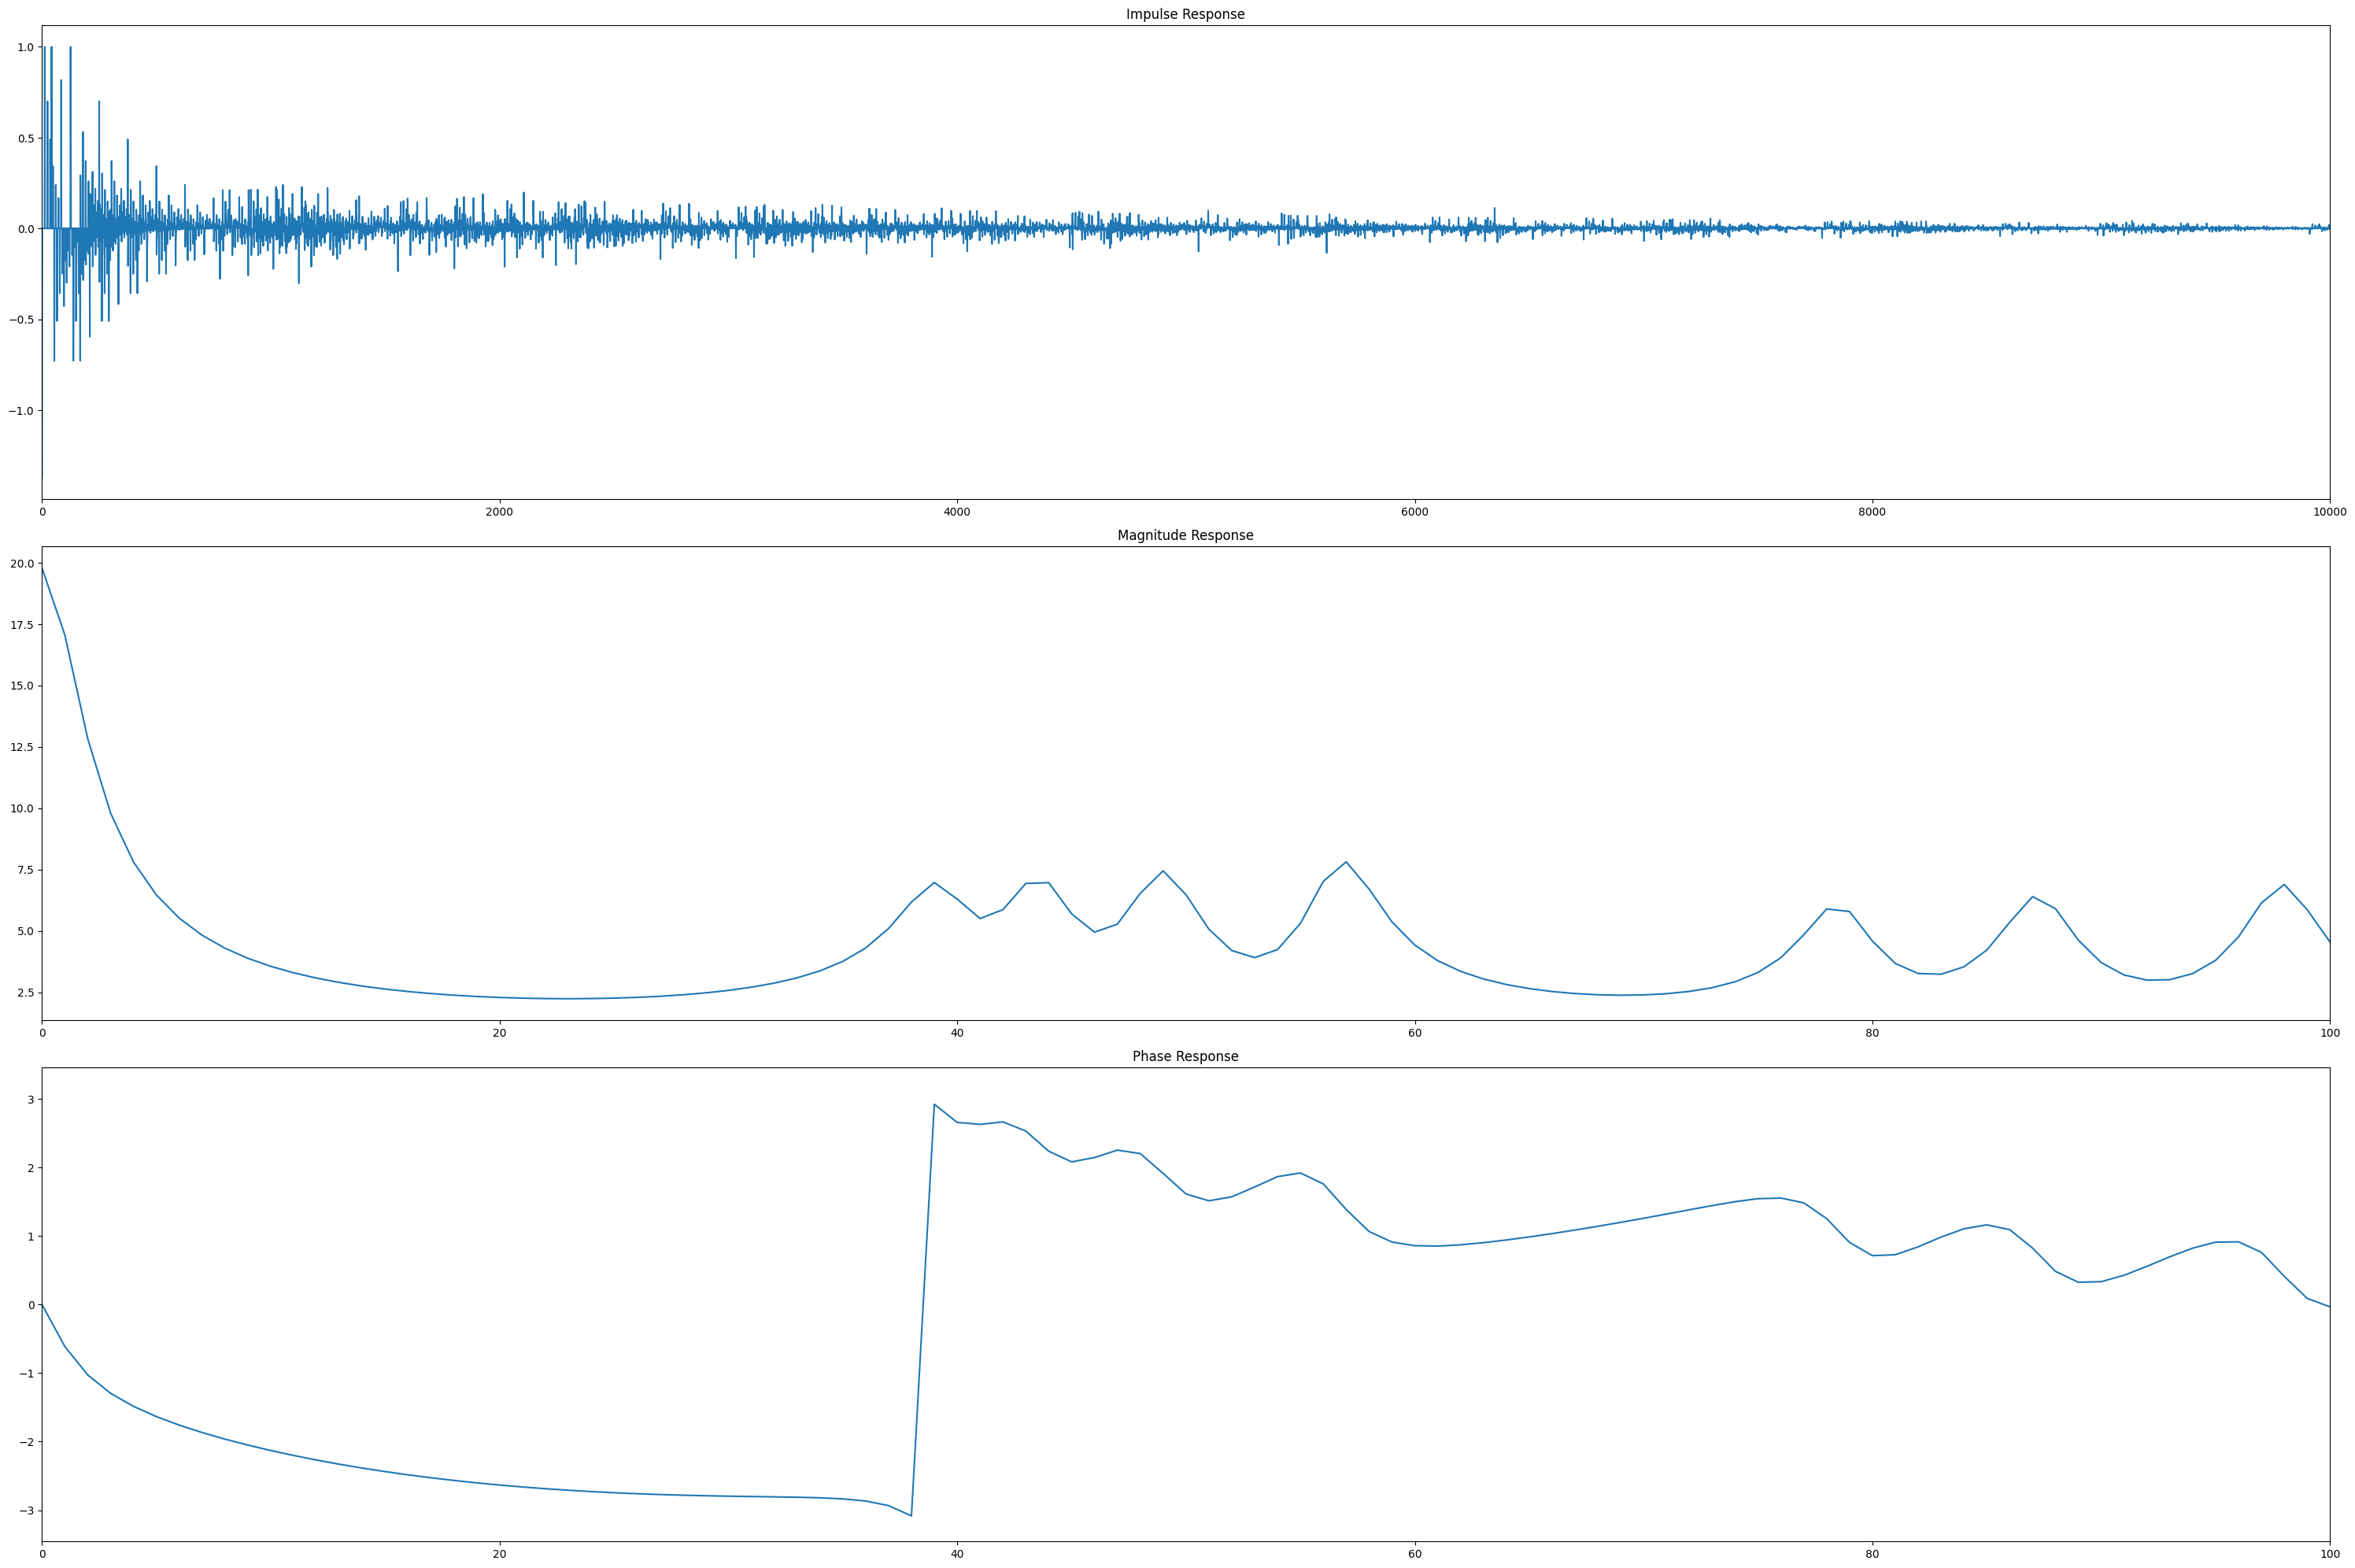

In [7]:
import matplotlib.pyplot as plt  
impulse = np.zeros((44100,2))  
impulse[0][0] = 1  # 在t=0时刻赋值为1
impulse[0][1] = 1

modeimpulse2=rvb.SATREV()

output=np.zeros_like(impulse)
np.copyto(output,modeimpulse2.process(impulse))

impulse_response = output[:,0] 
# 计算频率响应  
frequency_response = np.fft.fft(impulse_response)  
  
# 计算幅度和相位  
magnitude = np.abs(frequency_response)  
phase = np.angle(frequency_response)  
  
# 绘制结果
plt.figure(figsize=(30, 20))  # 设置整体图的尺寸  
plt.subplot(3, 1, 1)  
plt.plot(impulse_response)  
plt.title('Impulse Response') 
plt.xlim(0, 10000) 
  
plt.subplot(3, 1, 2)  
plt.plot(magnitude)  
plt.title('Magnitude Response')  
plt.xlim(0, 100) 
  
plt.subplot(3, 1, 3)  
plt.plot(phase)  
plt.title('Phase Response')  
plt.xlim(0, 100) 

plt.tight_layout(pad=1.0)  # 增加子图之间的间距
plt.show()  